In [5]:
# This script is written to implement random forest in morphometric data
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # data visualization
import seaborn as sns # statistical data visualization
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing im
port StandardScaler

In [6]:
# Read CSV file
df = pd.read_csv('morpho_data.csv')

# Declare features and target
features = list(df.drop("target", axis=1))
X = df.drop("target", axis=1)
Y = df['target']

# Transform to standard scale
scaler = StandardScaler()
X = StandardScaler.fit_transform(X)

# Split training and testing data set
X_train, X_test, Y_train, Y_test = train_test_split(X, df['target'], test_size = 0.3, random_state =4)


#cols = X_train.columns
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

features = list(df.drop("target", axis=1))


In [8]:
# Show the classwise counts
df['target'].value_counts()

S_richar    192
S_progra    168
S_macrop     82
S_raraen     59
S_nepale     27
Name: target, dtype: int64

In [12]:
# import Random Forest classifier

from sklearn.ensemble import RandomForestClassifier

# instantiate the classifier 
rfc = RandomForestClassifier(random_state=0)

# fit the model
rfc.fit(X_train, Y_train)

# Predict the Test set results
Y_pred = rfc.predict(X_test)

from sklearn.metrics import accuracy_score

print('Model accuracy score with 10 decision-trees : {0:0.4f}'. format(accuracy_score(Y_test, Y_pred)))




Model accuracy score with 10 decision-trees : 0.8553


In [15]:
# instantiate the classifier with n_estimators = 100
rfc_100 = RandomForestClassifier(n_estimators=100, random_state=0)

# fit the model to the training set
rfc_100.fit(X_train, Y_train)

# Predict on the test set results
Y_pred_100 = rfc_100.predict(X_test)

# Check accuracy score 
print('Model accuracy score with 100 decision-trees : {0:0.4f}'. format(accuracy_score(Y_test, Y_pred_100)))

Model accuracy score with 100 decision-trees : 0.8553


In [22]:
# create the classifier with n_estimators = 100
clf = RandomForestClassifier(n_estimators=100, random_state=0)

# fit the model to the training set
clf.fit(X_train, Y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

# view the feature scores
feature_scores = pd.Series(clf.feature_importances_, features).sort_values(ascending=False)
feature_scores


x181    0.103445
x51     0.049932
x82     0.046367
x61     0.043270
x11     0.040119
x21     0.039816
x12     0.039203
x161    0.039096
x162    0.036771
x32     0.034659
x41     0.033347
x71     0.031346
x31     0.029460
x122    0.027751
x42     0.027563
x141    0.027170
x131    0.027101
x171    0.026701
x22     0.024456
x151    0.021612
x132    0.021210
x182    0.020434
x112    0.019002
x172    0.017820
x62     0.017658
x72     0.016678
x102    0.016672
x81     0.015720
x121    0.014942
x101    0.014734
x142    0.014539
x111    0.013722
x152    0.013182
x52     0.012764
x91     0.012633
x92     0.009103
dtype: float64

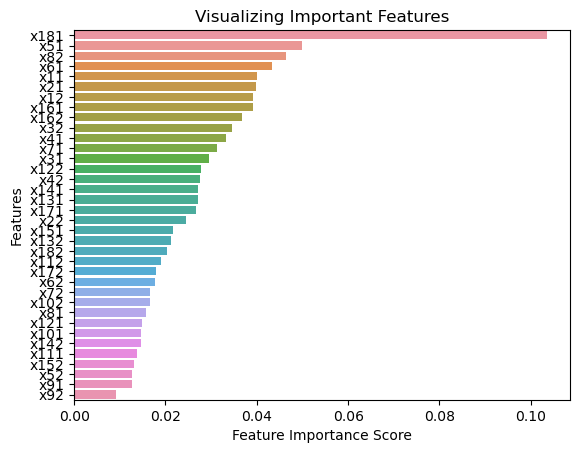

In [25]:
# Creating a seaborn bar plot

sns.barplot(x=feature_scores, y=feature_scores.index)



# Add labels to the graph

plt.xlabel('Feature Importance Score')

plt.ylabel('Features')

# Add title to the graph
plt.title("Visualizing Important Features")

# Visualize the graph
plt.show()





In [26]:
# Print the Confusion Matrix and slice it into four pieces

from sklearn.metrics import confusion_matrix

cm = confusion_matrix(Y_test, Y_pred)

print('Confusion matrix\n\n', cm)

Confusion matrix

 [[21  0  3  0  0]
 [ 1  0  3  0  5]
 [ 2  0 41  2  2]
 [ 1  0  2 15  0]
 [ 1  0  1  0 59]]


In [28]:
from sklearn.metrics import classification_report

print(classification_report(Y_test, Y_pred))

              precision    recall  f1-score   support

    S_macrop       0.81      0.88      0.84        24
    S_nepale       0.00      0.00      0.00         9
    S_progra       0.82      0.87      0.85        47
    S_raraen       0.88      0.83      0.86        18
    S_richar       0.89      0.97      0.93        61

    accuracy                           0.86       159
   macro avg       0.68      0.71      0.69       159
weighted avg       0.81      0.86      0.83       159



C:\Users\binod\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\binod\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\binod\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
